<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import statsmodels.api as sm
import statistics
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [54]:
# Загружаем файл с данными в рабочую область
head_hunter = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [55]:
# Выводим на экран 5 первых строк базы данных (БД)
display(head_hunter.head(5))

Пол, возраст           ЗП  \
0    Мужчина ,  39 лет , родился 27 ноября 1979   29000 руб.   
1     Мужчина ,  60 лет , родился 20 марта 1959   40000 руб.   
2  Женщина ,  36 лет , родилась 12 августа 1982   20000 руб.   
3      Мужчина ,  38 лет , родился 25 июня 1980  100000 руб.   
4     Женщина ,  26 лет , родилась 3 марта 1993  140000 руб.   

                           Ищет работу на должность:  \
0                            Системный администратор   
1                               Технический писатель   
2                                           Оператор   
3  Веб-разработчик (HTML / CSS / JS / PHP / базы ...   
4                  Региональный менеджер по продажам   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   
2  Тверь , не готова к переезду , не готова к ком...   
3  Саратов , не готов к переезду , готов к редким...   
4  Москва , не готова к переезду , готова к коман...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   
2                                   полная занятость   
3  частичная занятость, проектная работа, полная ...   
4                                   полная занятость   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   
2                                        полный день   
3                    гибкий график, удаленная работа   
4                                        полный день   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   
2  Опыт работы 10 лет 3 месяца  Октябрь 2004 — Де...   
3  Опыт работы 18 лет 9 месяцев  Август 2017 — Ап...   
4  Опыт работы 5 лет 7 месяцев  Региональный мене...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   
2                    ПАО Сбербанк   
3                        OpenSoft   
4                        Мармелад   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   
2                               Кассир-операционист   
3                               Инженер-программист   
4                              Менеджер по продажам   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   
2  Среднее специальное образование 2002 Профессио...  16.04.2019 08:35   
3  Высшее образование 2002  Саратовский государст...  08.04.2019 14:23   
4  Высшее образование 2015 Кгу Психологии и педаг...  22.04.2019 10:32   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано  
2                      Не указано  
3                      Не указано  
4                      Не указано

Задание 2.1
Прочитайте данные с помощью библиотеки Pandas. Перед чтением обратите внимание на разделитель внутри файла.
Чему равна размерность таблицы? Введите её в виде кортежа (число строк, число столбцов).

In [56]:
# Определяем размерность БД
head_hunter.shape

(44744, 12)

Задание 2.2
Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.
В каком формате представлен порядок слов в признаке «Пол, возраст»?

In [57]:
# Выводим на экран 2 первых строки базы данных (БД) столбца 'Пол, возраст'
display(head_hunter['Пол, возраст'].head(2))

0    Мужчина ,  39 лет , родился 27 ноября 1979
1     Мужчина ,  60 лет , родился 20 марта 1959
Name: Пол, возраст, dtype: object

Задание 2.3
Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.
Какой тип данных имеют все столбцы? Введите его в поле для ответа.

In [58]:
# Выводим на экран информацию  о числе непустых значений
display(head_hunter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

Задание 2.4
Обратите внимание на информацию о числе непустых значений.
Выберите все признаки, в которых есть пропуски в данных:

In [59]:
# Выводим на экран информацию  о количестве пропусков 
display(head_hunter.isnull().sum())

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

Задание 2.5
Выведите основную статистическую информацию о столбцах.
a. Сколько уникальных значений содержится в столбце «Опыт работы»?

In [60]:
# Выводим на экран информацию  о количестве уникальных значений столбце «Опыт работы»
print('Уникальных значений в столбце «Опыт работы»: ', len(head_hunter['Опыт работы'].value_counts()))

Уникальных значений в столбце «Опыт работы»:  44413


b. Какая из искомых должностей самая распространённая? Введите название.

In [61]:
# Выводим на экран информацию с самой распространённой должностью
display(head_hunter['Ищет работу на должность:'].describe())

count                       44744
unique                      14929
top       Системный администратор
freq                         3099
Name: Ищет работу на должность:, dtype: object

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.
4. Обратите внимание на информацию о числе непустых значений.

In [62]:
# Выводим на экран информацию о числе непустых значений в столбцах и их типах в таблице
display(head_hunter.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

5. Выведите основную статистическую информацию о столбцах.


In [63]:
# Выведим основную статистическую информацию о столбцах.
head_hunter.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 1987 Военный инженерный Кра...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [64]:
# Функция создания 4-х категорий образования
def education_level(educational_institution):
    educational=educational_institution.split()[:2]
    if educational[0] == "Высшее": return "высшее"
    elif educational[0] == "Неоконченное": return "неоконченное высшее"
    elif (educational[0] == "Среднее" and educational[1] == "специальное"): return "среднее специальное"
    else: return "Среднее"

head_hunter['Образование'] = head_hunter['Образование и ВУЗ'].apply(education_level)
del head_hunter['Образование и ВУЗ']
head_hunter['Образование'] = head_hunter['Образование'].astype('category')

Задание 3.1
Сколько соискателей имеет средний уровень образования (школьное образование)?

In [65]:
# Выводим статистическую информацию по столбцу 'Образование'
head_hunter['Образование'].value_counts()

высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
Среднее                  559
Name: Образование, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [66]:
# разделяем информацию из столбца 'Пол, возраст' на 3 столбца
head_hunter[['Пол', 'Возраст', 'Дата рождения']] = head_hunter['Пол, возраст'].str.split(',',expand=True)
head_hunter['Пол'] = head_hunter['Пол'].replace('Женщина ', 'Ж') # Заменяем слово Женщина на категорию Ж 
head_hunter['Пол'] = head_hunter['Пол'].replace('Мужчина ', 'М') # Заменяем слово Мужчина на категорию М
head_hunter['Пол'] = head_hunter['Пол'].astype('category') # Меняем тип столбца "Пол" на 'category'
head_hunter['Возраст'] = head_hunter['Возраст'].apply(lambda x: x.strip())
head_hunter[['Возраст', 'Лет']] = head_hunter['Возраст'].str.split(' ',expand=True)
head_hunter['Возраст'] = head_hunter['Возраст'].astype('int')# Меняем тип столбца "Возраст" на 'int'
head_hunter = head_hunter.drop(['Пол, возраст', 'Дата рождения','Лет'],  axis=1) # Удаляем столбцы

Задание 3.2
a. Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.

In [67]:
# Выводим информацию по гендерному признаку
round(head_hunter['Пол'].value_counts(normalize=True)*100, 2)

М    80.93
Ж    19.07
Name: Пол, dtype: float64

b. Чему равен средний возраст соискателей? Ответ округлите до десятых.

In [68]:
# Выводим статистическую информацию о среднем возрасте соскателей
print('Cредний возраст соискателей', round(head_hunter['Возраст'].mean(),1), 'лет')

Cредний возраст соискателей 32.2 лет


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


Задание 3.3
Чему равен медианный опыт работы (в месяцах) в нашей таблице?

In [69]:
# преобразовываем данные из столбца "Опыт работы" в столбец "Опыт работы (месяц)"
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано': return None
    year_words = ['год', 'года', 'лет']
    month_words = ['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)

head_hunter['Опыт работы (месяц)'] = head_hunter['Опыт работы'].apply(get_experience) #Создаем столбец Опыт работы (месяц)
print('Медианный опыт работы (в месяцах): ', round(head_hunter['Опыт работы (месяц)'].median()))
head_hunter = head_hunter.drop('Опыт работы', axis=1) #удаляем столбец Опыт работы

Медианный опыт работы (в месяцах):  100


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


Задание 3.4
a. Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.

In [70]:
# Переводим признак города в категорию
def city_df(arg):
    million_cities = ['Новосибирск ', 'Екатеринбург ','Нижний Новгород ','Казань ', 'Челябинск ','Омск ', 'Самара ', 'Ростов-на-Дону ', 'Уфа ', 'Красноярск ', 'Пермь ', 'Воронеж ','Волгоград ']
    agrg_splitted=arg.split(',')[0]
    #print(agrg_splitted)
    if (agrg_splitted=='Москва ' or agrg_splitted=='Санкт-Петербург '): 
        
        return agrg_splitted
    elif agrg_splitted in million_cities: 
        
        return 'город-миллионник'
    else: 
        
        return 'другие'

head_hunter['Город'] = head_hunter['Город, переезд, командировки'].apply(city_df)
print('В Санкт-Петербурге живут', round(head_hunter['Город'].value_counts(normalize=True)['Санкт-Петербург '] * 100), '% соискателей') 

В Санкт-Петербурге живут 11 % соискателей


b. Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.

In [71]:
# Готовность к переезду
def migration_df(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True
    
head_hunter['Готовность к переезду'] = head_hunter['Город, переезд, командировки'].apply(migration_df)
head_hunter['Готовность к переезду'].value_counts(normalize=True)*100

False    64.185142
True     35.814858
Name: Готовность к переезду, dtype: float64

In [72]:
# Готовность к командровкам
def business_trip(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else: 
            
            return True
    else:
        return False
    
head_hunter['Готовность к командировкам'] = head_hunter['Город, переезд, командировки'].apply(business_trip)
head_hunter['Готовность к командировкам'].value_counts(normalize=True)*100

True     70.713392
False    29.286608
Name: Готовность к командировкам, dtype: float64

In [73]:
# Готовность к переезду и командровкам 
print('Готовы и к переездам, и к командировкам:',round(head_hunter[
head_hunter['Готовность к переезду'] & head_hunter['Готовность к командировкам']
].shape[0] / head_hunter.shape[0] *100),'%')


Готовы и к переездам, и к командировкам: 32 %


In [74]:
# Удаляем столбцы 'Город, переезд, командировки'
head_hunter = head_hunter.drop(['Город, переезд, командировки'],  axis=1)

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [75]:
# Создаем столбцы признаки-мигалки
employments = ['полная занятость', 'частичная занятость',
        'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график', 
        'гибкий график', 'удаленная работа',
        'вахтовый метод']
for employment, chart in zip(employments, charts):
    head_hunter[employment] = head_hunter['Занятость'].apply(lambda x: employment in x)
    head_hunter[chart] = head_hunter['График'].apply(lambda x: chart in x)


In [76]:
# Проверяем наличие столбцов с прзнаками-мигалками 
head_hunter.tail()

ЗП                          Ищет работу на должность:  \
44739   50000 руб.  Финансист, аналитик, экономист, бухгалтер, мен...   
44740   39000 руб.             Системный администратор, IT-специалист   
44741   40000 руб.                         Аналитик данных, Математик   
44742   20000 руб.                                   Контент-менеджер   
44743  120000 руб.                               Руководитель проекта   

                                               Занятость  \
44739                                   полная занятость   
44740  проектная работа, частичная занятость, полная ...   
44741                                   полная занятость   
44742              частичная занятость, полная занятость   
44743                                   полная занятость   

                                                  График  \
44739                      полный день, удаленная работа   
44740  удаленная работа, гибкий график, полный день, ...   
44741                      полный день, удаленная работа   
44742                                   удаленная работа   
44743                                        полный день   

                         Последнее/нынешнее место работы  \
44739  ООО "IAS" (независимый участник объединения Ru...   
44740                                       ИП Пестрецов   
44741  ОАО «ЧМК», Исследовательско-Технологический Це...   
44742                                          IQ-Maxima   
44743                                  ПАО ГК ТНС энерго   

                    Последняя/нынешняя должность Обновление резюме  \
44739                     Руководитель субгруппы  22.04.2019 12:32   
44740                            Предприниматель  22.04.2019 13:11   
44741                 Начальник группы аналитики  09.04.2019 05:07   
44742                          Менеджер проектов  26.04.2019 14:25   
44743  Руководитель отдела технической поддержки  05.07.2018 20:15   

                                 Авто Образование Пол  ...  полная занятость  \
44739                      Не указано      высшее   М  ...              True   
44740                      Не указано      высшее   М  ...              True   
44741                      Не указано      высшее   Ж  ...              True   
44742  Имеется собственный автомобиль      высшее   М  ...              True   
44743                      Не указано      высшее   М  ...              True   

       полный день частичная занятость  сменный график  проектная работа  \
44739         True               False           False             False   
44740         True                True            True              True   
44741         True               False           False             False   
44742        False                True           False             False   
44743         True               False           False             False   

       гибкий график  волонтерство  удаленная работа  стажировка  \
44739          False         False              True       False   
44740           True         False              True       False   
44741          False         False              True       False   
44742          False         False              True       False   
44743          False         False             False       False   

       вахтовый метод  
44739           False  
44740           False  
44741           False  
44742           False  
44743           False  

[5 rows x 25 columns]

Задание 3.5
a. Сколько людей ищут проектную работу или волонтёрство (в обоих столбцах стоит True)?

In [77]:

print('Ищут проектную работу или волонтёрство',head_hunter[head_hunter['проектная работа'] & head_hunter['волонтерство']].shape[0], 'человек')

Ищут проектную работу или волонтёрство 436 человек


b. Сколько людей хотят работать вахтовым методом или с гибким графиком (в обоих столбцах стоит True)?

In [78]:
print('Хотят работать вахтовым методом или с гибким графиком',head_hunter[head_hunter['вахтовый метод'] & head_hunter['гибкий график']].shape[0], 'человек')   

Хотят работать вахтовым методом или с гибким графиком 2311 человек


In [79]:
# Удаляем столбцы 'Занятость' и 'График'
head_hunter = head_hunter.drop(['Занятость','График'], axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


Задание 3.6
Для выполнения этого задания у вас будет 5 попыток. После того как вы дадите правильный ответ ИЛИ истратите все попытки, вы можете нажать на кнопку «Показать ответ»: в конце решения вы увидите ссылку на эталонный ответ.

Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)? В ответе укажите целое число тысяч.

1-й вариант

In [80]:
# Выделяем из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется.
# Наименование валюты переводим в стандарт ISO
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary
def get_salary_сurrency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]


head_hunter['Желаемая ЗП'] = head_hunter['ЗП'].apply(get_salary_num)
head_hunter['Валюта'] = head_hunter['ЗП'].apply(get_salary_сurrency)

# Переводим признак «Обновление резюме» из таблицы с резюме в формат datetime
# и достаем из него дату
head_hunter['Обновление резюме'] = pd.to_datetime(head_hunter['Обновление резюме'])
head_hunter['Обновление резюме'] = head_hunter['Обновление резюме'].dt.date
head_hunter['Обновление резюме'] = pd.to_datetime(head_hunter['Обновление резюме'])

# приводим признак date из таблицы с валютами
Exchange_rates= pd.read_csv('data/ExchangeRates.csv', sep=',')
Exchange_rates['date'] = pd.to_datetime(Exchange_rates['date'])
Exchange_rates = Exchange_rates.drop(['vol','time', 'per'],  axis=1)
# Объединяем таблицу с данными HeadHunter с таблицей с валютами
merged = head_hunter.merge(
    Exchange_rates,
    left_on = ['Валюта', 'Обновление резюме'],
    right_on = ['currency', 'date',],
    how = 'left'
)
# Обновляем рублеыми данными данные таблцы с валютами 
merged.loc[merged['Валюта'] == 'RUB', 'currency'] = 'RUB'
merged.loc[merged['Валюта'] == 'RUB', 'close'] = 1
merged.loc[merged['Валюта'] == 'RUB', 'proportion'] = 1
# Переводим валюту в рубли 
merged['Желаемая ЗП'] = merged['Желаемая ЗП'].astype('float')
merged['ЗП (руб)'] = merged['Желаемая ЗП']*merged['close']/merged['proportion']
med_zp = round(merged['ЗП (руб)'].median()/1000,)
print(f'Медианная зарплата {med_zp} тыс. руб.')


Медианная зарплата 59 тыс. руб.


2-й вариант

In [81]:

# Выделяем из столбца «ЗП» сумму желаемой заработной платы и наименование валюты, в которой она исчисляется.
# Наименование валюты переводм в стандарт ISO
head_hunter[['Желаемая ЗП', 'Валюта']] = head_hunter['ЗП'].str.split(' ',expand = True)
head_hanter=head_hunter.replace({'Валюта' : {'руб.' : 'руб', 'грн.' : 'UAH', 'бел.руб.' : 'BYN', 'сум' : 'UZS'}})

#Перевести признак «Обновление резюме» из таблицы с резюме в формат datetime и достать из него дату
head_hanter['Обновление резюме'] = pd.to_datetime(head_hanter['Обновление резюме'])
head_hanter['Обновление резюме'] = head_hanter['Обновление резюме'].dt.date
head_hanter['Обновление резюме'] = pd.to_datetime(head_hanter['Обновление резюме'])

#привести признак date из таблицы с валютами
Exchange_rates= pd.read_csv('data/ExchangeRates.csv', sep = ',')
Exchange_rates['date'] = pd.to_datetime(Exchange_rates['date'])
Exchange_rates = Exchange_rates.drop(['vol','time', 'per'],  axis=1)

# Объединение 2-х таблиц
merged = head_hanter.merge(
    Exchange_rates, 
    left_on = ['Валюта', 'Обновление резюме'],
    right_on = ['currency', 'date',], 
    how = 'left'
)

merged.loc[merged['Валюта'] == 'руб', 'currency'] = 'руб'
merged.loc[merged['Валюта'] == 'руб', 'close'] = 1
merged.loc[merged['Валюта'] == 'руб', 'proportion'] = 1
merged['Желаемая ЗП'] = merged['Желаемая ЗП'].astype('float')
merged['ЗП (руб)'] = merged['Желаемая ЗП']*merged['close'] / merged['proportion']
round(merged['ЗП (руб)'].median()/1000,)

59

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Задание 4.1
Чему равно модальное значение возраста соискателей?

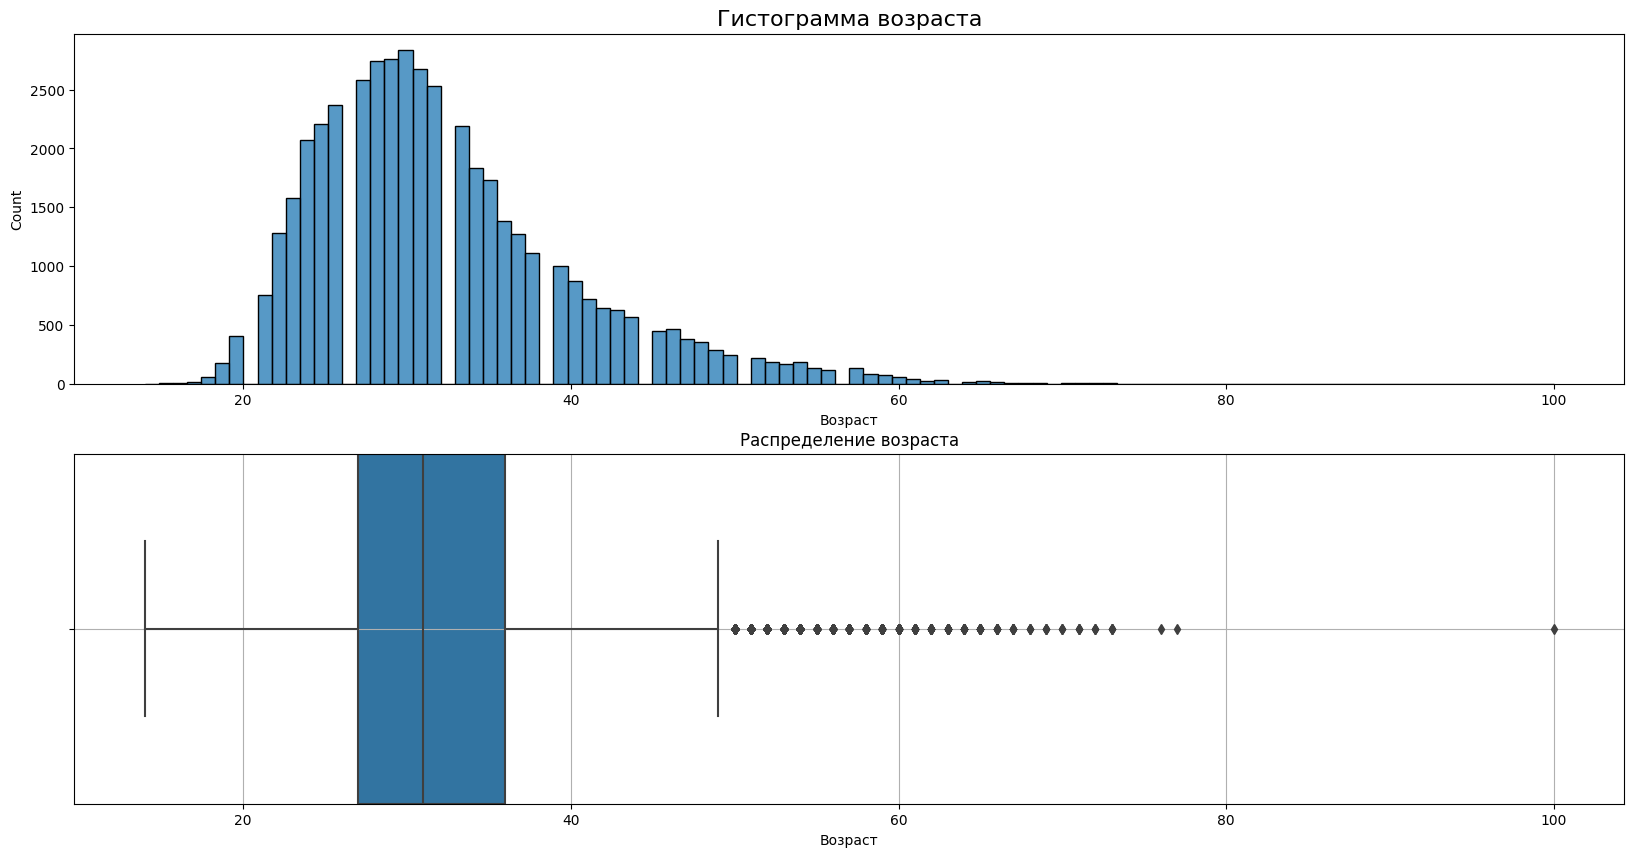

In [82]:
# Строим график- распределение признака "Возраст"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10))
sns.histplot(
    data = merged,
    x = 'Возраст',
    bins = 100,
    ax = axes[0]
);
axes[0].set_title('Гистограмма возраста', fontsize=16)
boxplot = sns.boxplot(
    data = merged,
    x = 'Возраст',
    orient = 'h',
    width = 1
)
boxplot.set_title('Распределение возраста');
boxplot.set_xlabel('Возраст');
boxplot.grid()

In [83]:
# Подтверждение определения моды статичтическим методом
mode_v = statistics.mode(merged['Возраст'])
print('Мода распределения ровна', mode_v)

Мода распределения ровна 30


Выводы: 
1. модальное значение возраста соискателей равна 30 лет
2. Предельные значения признака: min 14, max 100 лет
Аномалии:  с моей точки зрения аномальными являются : возраст от 14 до 18, и от 75 и выше, особенно аномально выглядит значение в 100 лет  

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Задание 4.2
Чему равен максимальный опыт работы (в месяцах)?

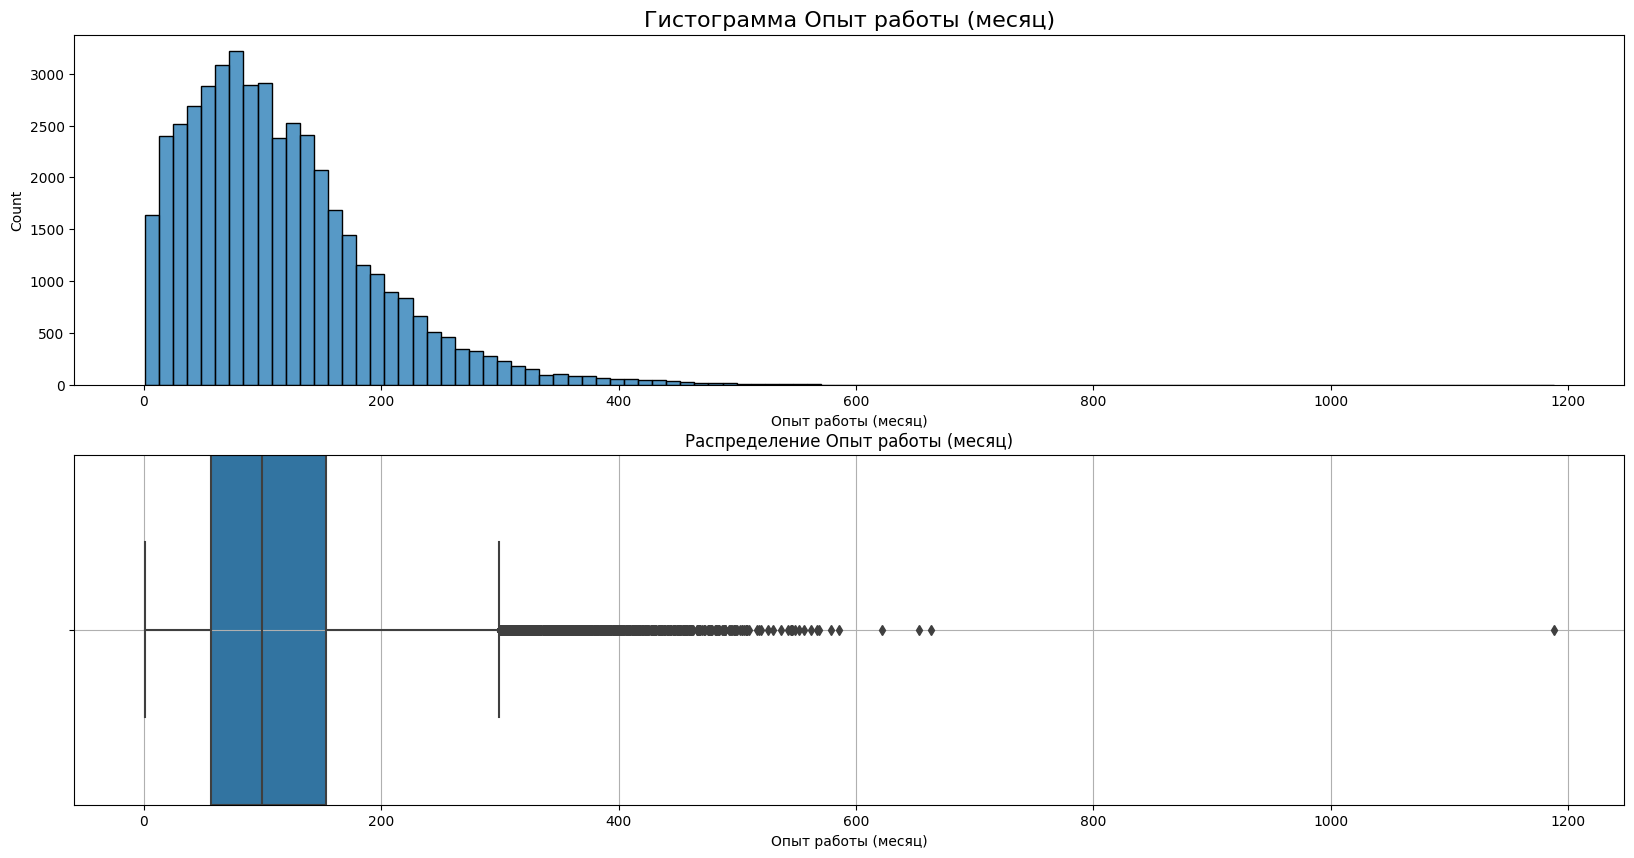

In [84]:
# Строим график- распределение признака "Опыт работы (месяц)"
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 10))
sns.histplot(
    data = merged,
    x = 'Опыт работы (месяц)',
    bins = 100,
    ax = axes[0]
);
axes[0].set_title('Гистограмма Опыт работы (месяц)', fontsize=16)
boxplot = sns.boxplot(
    data = merged,
    x = 'Опыт работы (месяц)',
    orient = 'h',
    width = 1   
)
boxplot.set_title('Распределение Опыт работы (месяц)');
boxplot.set_xlabel('Опыт работы (месяц)');
boxplot.grid()

In [85]:
print('Максимальный опыт работы (в месяцах)', merged['Опыт работы (месяц)'].max())
# Подтверждение определения моды статичтическим методом
print('Мода распределения опыта работы в месяцах', statistics.mode(merged['Опыт работы (месяц)']))

Максимальный опыт работы (в месяцах) 1188.0
Мода распределения опыта работы в месяцах 81.0


Вывод: Распределение - имеет левостороннюю асимметрии ряда. Опыт работы 1188 месяцев- это аномальный выброс. Для признака Возраст аномальными значениями можно считать возраст старше 75 лет. 

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста (100 лет)? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


Задание 4.3
Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.

In [86]:
# Строим график- распределение признака "ЗП(руб)"
cufflinks.set_config_file(world_readable = True, theme = 'pearl', offline = True)
df = px.data.iris()
fig = px.histogram(merged, x = "ЗП (руб)", marginal = "box")
fig.show()

In [87]:
# Подтверждение определения колчества соискателей с желанием иметь ЗП более 1 млн. руб.
print('Колчество соискателей с желанием иметь ЗП более 1 млн. руб.:',len(merged[merged['ЗП (руб)'] > 1000000]), 'человек')

Колчество соискателей с желанием иметь ЗП более 1 млн. руб.: 5 человек


Вывовд: Количество людей, желающих получать заработную плату выше 1 миллиона рублей - 5 человек.  заработная плата большинства соискателей находится в интервале от 37 тыс. руб до 95 тыс. руб. Самая высокая желаемая  заработная плата более 24 миллионов рублей, с моей точки зрения это значение аномально, т.к. на такую ЗП через HH не обращаются (тем более из "других городов"). Имеется аномалия по признаку возраста: есть соискатель с возрастом 100 лет.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

Задание 4.4
Какая категория образования оплачивается выше всех по медианному показателю?

In [88]:
# Строим зависимость медианной желаемой заработной платы от уровня образования
bar_data = merged.groupby(
    by = 'Образование',
    as_index=False
)[['ЗП (руб)']].median().round(2).nlargest(10, columns=['ЗП (руб)'])

fig = px.bar(bar_data, x = 'ЗП (руб)', y='Образование',log_x = True,  orientation = 'h') 
fig.show() 

Вывод:  наибольший уровень желаемой заработной платы наблюдаются для высшего образования, а для среднего  среднего специального наименьший уровнь желаемой заработной платы. При прогнозировании заработной платы необходимо обязательно учитывать уровнь образования соискателей

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Задание 4.5
В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?

In [89]:
# Строим диаграмму, которая показывает распределение желаемой заработной платы
# в зависимости от города
mask = merged['ЗП (руб)'] < 1000000
df = merged[mask]
fig = px.histogram(df, x = "ЗП (руб)", color = "Город", marginal = "box")
fig.show()

Выводы: Чем крупнее город, тем медианное значение ождаемой ЗП выше (пример Москва  С-Петербург). Межквартильный размах(IQR), в который попадают 50% значенй ождаемых ЗП, также больше. При прогнозировании заработной платы очень важен признак города.
Ответ на задание: В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей) - другие (нижняя коробчатая даграмма, крайнее правое значение )

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [90]:
# Cтроим многоуровневую столбчатую диаграмму, которая показывает зависимость медианной ЗП
# от признаков "Готовность к переезду" и "Готовность к командировкам".
bar_data = merged.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index = False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame = bar_data,
    y = 'Готовность к переезду',
    x = 'ЗП (руб)',
    barmode = "group",
    color = 'Готовность к командировкам',
    orientation = 'h',
    title = 'Медианная ЗП по готовности к командировкам/переезду'
)
fig.show()

Вывод: Максимальная ЗП (меданная) у лиц готовых и к переезду и командровкам, минимальная у тех кто не готов переезжать и ездть в командировки

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [91]:
# Строим сводную таблицу, иллюстрирующую зависимость медианной желаемой заработной платы
# от возраста  и образования
pivot = merged.pivot_table(
    values = 'ЗП (руб)',
    columns = 'Возраст',
    index = 'Образование',
    aggfunc = {'ЗП (руб)': np.median}
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

Возраст                  14       15         16       17       18       19   \
Образование                                                                   
Среднее                  NaN  10000.0        NaN  44000.0  35000.0  45000.0   
высшее               60000.0      NaN  122582.49  90075.5  30000.0  30000.0   
неоконченное высшее      NaN      NaN        NaN  80000.0  25000.0  30000.0   
среднее специальное      NaN   2000.0   30000.00  25000.0  25151.0  30000.0   

Возраст                  20       21       22       23   ...       67   \
Образование                                              ...             
Среднее              29000.0  40000.0  40000.0  35000.0  ...       NaN   
высшее               30000.0  35000.0  40000.0  45000.0  ...   70000.0   
неоконченное высшее  31000.0  35000.0  40000.0  40000.0  ...       NaN   
среднее специальное  30000.0  30000.0  30000.0  35000.0  ...  120000.0   

Возраст                  68        69       70       71       72       73   \
Образование                                                                  
Среднее                  NaN       NaN      NaN      NaN      NaN      NaN   
высшее               79000.0  112500.0  80000.0  75000.0  75000.0  62500.0   
неоконченное высшее      NaN       NaN      NaN      NaN      NaN      NaN   
среднее специальное      NaN       NaN      NaN      NaN      NaN      NaN   

Возраст                  76       77       100  
Образование                                     
Среднее                  NaN      NaN      NaN  
высшее               45000.0  90000.0      NaN  
неоконченное высшее      NaN      NaN      NaN  
среднее специальное      NaN      NaN  60000.0  

[4 rows x 63 columns]

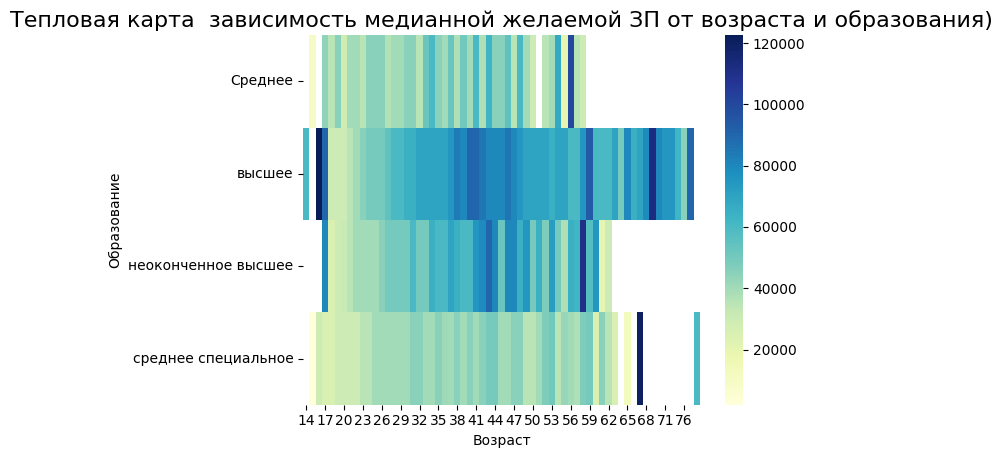

In [92]:
# Строим тепловую диаграмму на основании сводной таблцы
heatmap = sns.heatmap(data = pivot, cmap = 'YlGnBu')
heatmap.set_title('Тепловая карта  зависимость медианной желаемой ЗП от возраста и образования)', fontsize = 16);

Вывод:  самый быстрый карьерный рост (то есть интенсивность роста заработной платы наибольшая) у соискателей с  высшим образованием. Наблюдаются аномальные выбросы медианной ЗП в категории высшее и неоконченное высшее образование в возрасте 14-17 лет

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [93]:
# Строим диаграмму рассеяния, показывающую зависимость
# опыта работы от возраста 
merged['Опыт работы'] = merged['Опыт работы (месяц)']/12

fig = px.scatter(merged, x = "Возраст", y = "Опыт работы", title = 'Зависимость опыта работы от возраста' )
fig.add_trace(
    go.Scatter(
        x = [0, 100],
        y = [0, 100],
        mode = "lines",
        line = go.scatter.Line(color="gray"),
        showlegend=False)
)

fig.show()
merged = merged.drop(['Опыт работы'],  axis=1)

Вывод: на данном графике видно 7 аномальных точек (ошибочно или умышленно ввденные данные), находящихся над линией тренда

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [94]:
# Зависимость медианной желаемой заработной платы от гендерного признака
bar_data = merged.groupby(
    by = 'Пол',
    as_index = False
)[['ЗП (руб)']].median().round(2).nlargest(10, columns = ['ЗП (руб)'])

fig = px.bar(bar_data, x = 'ЗП (руб)', y = 'Пол',log_x = True,  orientation = 'h') 
fig.show() 

Вывод: мужчины хотят ЗП выше почти в 1,25 раза

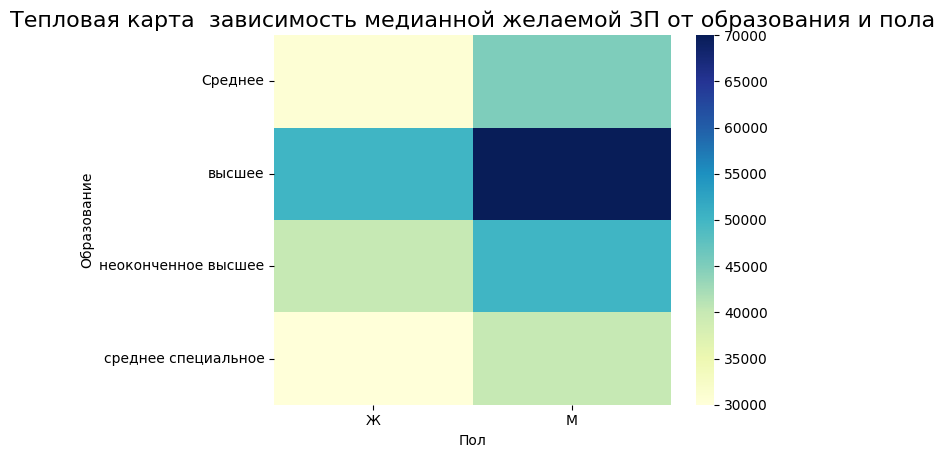

In [95]:
# Строим зависимость медианной желаемой заработной платы от гендерного признака и от обзазования
pivot = merged.pivot_table(
    values = 'ЗП (руб)',
    columns = 'Пол',
    index = 'Образование',
    aggfunc = {'ЗП (руб)': np.median}
)
pivot.columns = pivot.columns.astype('string')
heatmap = sns.heatmap(data = pivot, cmap = 'YlGnBu')
heatmap.set_title('Тепловая карта  зависимость медианной желаемой ЗП от образования и пола', fontsize = 16);

Вывод: Ожидаемая ЗП мужчины выше, на всех уровнях образования

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [96]:
# Удаляем ненужные столбцы
merged = merged.drop(['ЗП', 'currency','Валюта', 'date', 'close', 'proportion', 'Желаемая ЗП'],  axis=1)

Задание 5.1
Начнём с дубликатов в наших данных. Найдите полные дубликаты в таблице с резюме и удалите их.

Сколько полных копий удалось найти?

In [97]:
duplicates = merged[merged.duplicated(subset=merged.columns)]
drop_dupl_data = merged.drop_duplicates()
print('Полных копий', duplicates.shape[0])

Полных копий 161


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

Задание 5.2
Займёмся пропусками. Выведите информацию о числе пропусков в столбцах.

Сколько пропусков в столбце «Опыт работы (месяц)»?

In [98]:
print('Колчество пропусков в столбце Опыт работы (месяц)', drop_dupl_data['Опыт работы (месяц)'].isnull().sum())

Колчество пропусков в столбце Опыт работы (месяц) 168


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [99]:
# Удаляем строки с нулевыми значениями в столбцах 
# 'Последнее/нынешнее место работы' и 'Последняя/нынешняя должность'
drop_dupl_data = drop_dupl_data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
# Заменяем ячейки с нулевыми значениями в столбце Опыт работы (месяц) на медианное значение столбца
drop_dupl_data['Опыт работы (месяц)'] = drop_dupl_data['Опыт работы (месяц)'].fillna(drop_dupl_data['Опыт работы (месяц)'].median())

display(drop_dupl_data.isnull().sum())


Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
полный день                        0
частичная занятость                0
сменный график                     0
проектная работа                   0
гибкий график                      0
волонтерство                       0
удаленная работа                   0
стажировка                         0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64

Задание 5.3
Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.

In [100]:
print("Среднее значение столбца Опыта работы(месяц)", round(drop_dupl_data['Опыт работы (месяц)'].mean()))

Среднее значение столбца Опыта работы(месяц) 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

Задание 5.4
Сколько выбросов вы нашли?

In [101]:
# Определим количество выбросов по условию
outliers = drop_dupl_data[(drop_dupl_data['ЗП (руб)'] > 1000000) | (drop_dupl_data['ЗП (руб)'] < 1000)]
cleaned = drop_dupl_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей до удаления выбросов: {drop_dupl_data.shape[0]}')
print(f'Результирующее число записей после удаления выбросов: {cleaned.shape[0]}')
print('Количество выбросов', len(drop_dupl_data[drop_dupl_data['ЗП (руб)'] > 1000000]) + len(drop_dupl_data[drop_dupl_data['ЗП (руб)'] < 1000]))



Результирующее число записей до удаления выбросов: 44581
Результирующее число записей после удаления выбросов: 44492
Количество выбросов 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


Задание 5.5
Сколько выбросов вы нашли?

In [102]:
cleaned['Опыт работы']=cleaned['Опыт работы (месяц)']/12
outliers = cleaned[cleaned['Опыт работы'] > cleaned['Возраст']]
cleaned = cleaned.drop(outliers.index, axis=0)
print(f'Количество выбросов', outliers.shape[0])


Количество выбросов 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. В какую сторону **асимметрично логарифмическое распределение**? Напишите об этом в коммментарии. Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

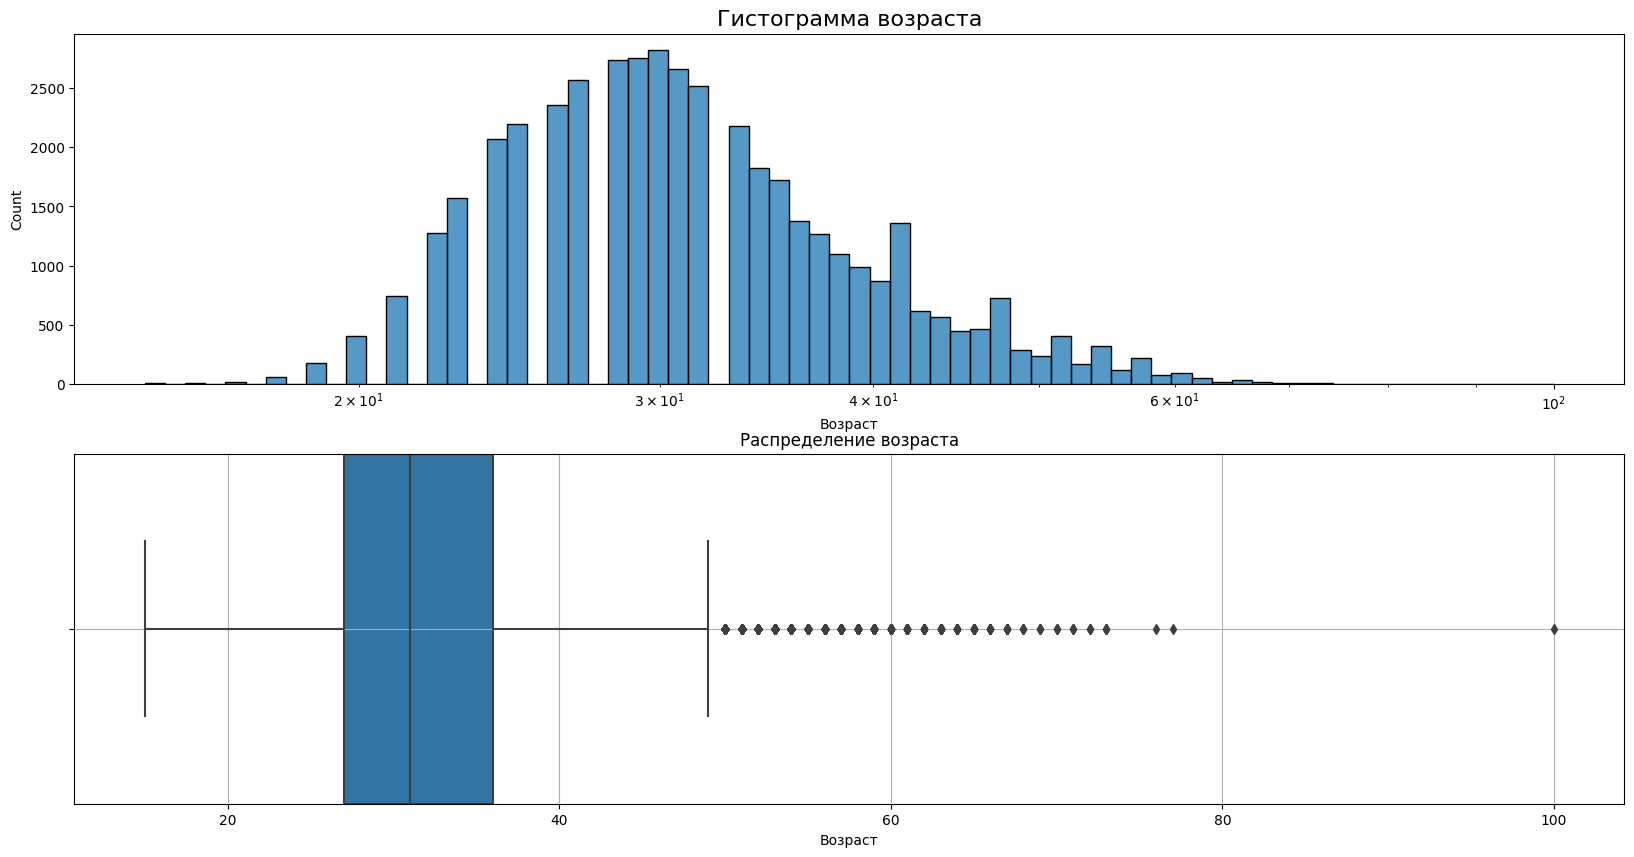

In [103]:
# Строим гистограмму с логарифмической шкалой
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10))
sns.histplot(
    data=cleaned,
    x='Возраст',
    bins=70,
    log_scale=True,
    ax=axes[0]
);
axes[0].set_title('Гистограмма возраста', fontsize=16)
boxplot = sns.boxplot(
    data=cleaned,
    x='Возраст',
    orient='h',
    width=1
)
boxplot.set_title('Распределение возраста');
boxplot.set_xlabel('Возраст');
boxplot.grid()

Задание 5.6
Сколько выбросов вы нашли с помощью метода z-отклонений?

In [104]:
# Находим колчество выбросов ]
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(cleaned, 'Возраст', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')




Число выбросов по методу z-отклонения: 3


Вывод: по методу z-отклонения выявлено 3 соискателя, возраст которых превышает 75 лет.